In [1]:
import operator
import numpy as np
import pandas as pd
import scipy.optimize
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Question 1:

In [2]:
EPSILON = 0.001
DENOMINATOR_RANGE = 5
def plotIntersection(plot_range, f, g, y_axis_lim: list = None):
    """
    Function that getting plot_range and two function (f and g) and plot them with their cutting points
    """
    # get y value of f and g in each range of plot_range points
    y_f = [f(x) for x in plot_range]
    y_g = [g(x) for x in plot_range]
    plt.plot(plot_range, y_f)
    plt.plot(plot_range, y_g)
    
    # create the equation f(x) - g(x) = 0 and get the root points in the range of plot_range
    h = lambda x: f(x) - g(x)
    
    # use the fsolve function couple of times with different x0 to get all the root of h function
    # for each x getting, check if f(x) and g(x) are close by EPSILON
    x_points = []
    for denominator in range(1, DENOMINATOR_RANGE):
        x0_range = np.array([min(plot_range) / denominator, max(plot_range) / denominator])
        x_points.extend(scipy.optimize.fsolve(h, x0_range))
        
    # take only the x points that are cutting points
    x_points = list(filter(lambda x: abs(f(x) - g(x)) < EPSILON ,x_points))

    # for each x point get the y axis value
    y_points = [f(x) for x in x_points]
    
    # plot each <x, y> point
    for x, y in zip(x_points, y_points):
        plt.plot(x, y, 'ro')
    
    # plot line of x and y axis
    axes = plt.gca()
    plt.plot((min(plot_range), max(plot_range)), (0, 0), 'k-', linewidth=0.5)
    plt.plot((0, 0), (axes.get_ylim()), 'k-', linewidth=0.5)
    
    # plot y axis by given limit if given
    if y_axis_lim:
        plt.ylim(y_axis_lim)
        
    plt.tight_layout()
    plt.grid()
    plt.show()

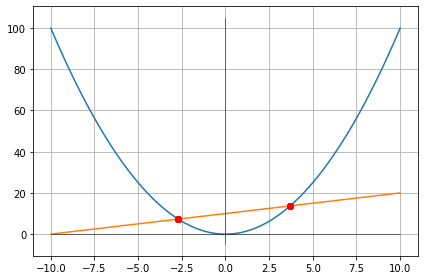

In [3]:
# example
f = lambda x : x ** 2
g = lambda x : x + 10
plotIntersection(np.linspace(-10, 10, 100), f, g)

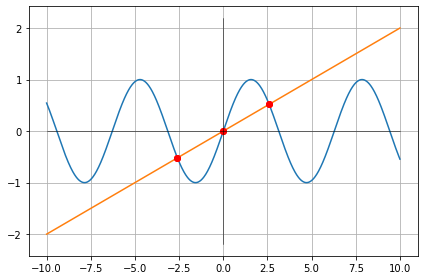

In [4]:
# example
f = lambda x : np.sin(x)
g = lambda x : x * 0.2
plotIntersection(np.linspace(-10, 10, 1000), f, g)

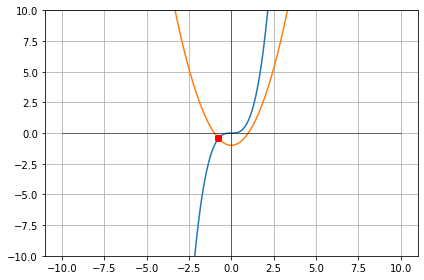

In [5]:
# example
f = lambda x : x ** 3
g = lambda x : x ** 2 - 1
plotIntersection(np.linspace(-10, 10, 1000), f, g, y_axis_lim=[-10, 10])

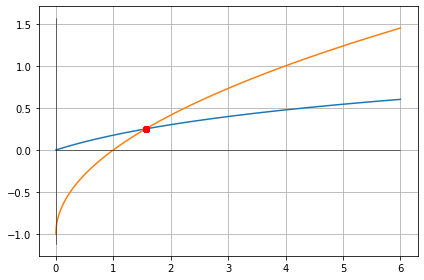

In [6]:
# example
f = lambda x : np.log10(0.5 * x + 1)
g = lambda x : np.sqrt(x) - 1
plotIntersection(np.linspace(0, 6, 1000), f, g)

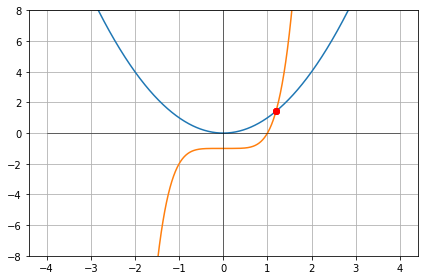

In [7]:
# example
f = lambda x : x ** 2
g = lambda x : x ** 5 - 1
plotIntersection(np.linspace(-4, 4, 1000), f, g, [-8, 8])

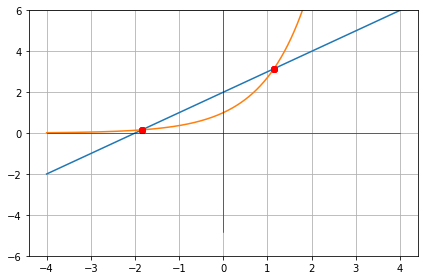

In [8]:
# example
f = lambda x : x + 2
g = lambda x : np.e ** x
plotIntersection(np.linspace(-4, 4, 1000), f, g, [-6, 6])

## Question 2:

In [9]:
national_budget = pd.read_csv('data/national-budget.csv')

In [10]:
national_budget.head()

,שנה,קוד רמה 1,שם רמה 1,קוד ושם רמה 1,קוד רמה 2,שם רמה 2,קוד ושם רמה 2,קוד סוג סעיף,שם סוג סעיף,קוד סעיף,...,סוג תקציב,הוצאה נטו,הוצאה מותנית בהכנסה,הכנסה מיועדת,הרשאה להתחייב,שיא כח אדם,עבצ,כמות,יתרת התחיבויות,תקציב קורונה
0,1997,1,בטחון וסדר ציבורי,1-בטחון וסדר ציבורי,11,בטחון,11-בטחון,1.0,תקציב רגיל,15.0,...,ביצוע,5548100.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN
1,1997,1,בטחון וסדר ציבורי,1-בטחון וסדר ציבורי,11,בטחון,11-בטחון,1.0,תקציב רגיל,15.0,...,מאושר,10262268.0,0.0,0.0,0.0,2022.5,0.0,0.0,NaN,NaN
2,1997,1,בטחון וסדר ציבורי,1-בטחון וסדר ציבורי,11,בטחון,11-בטחון,1.0,תקציב רגיל,15.0,...,מקורי,10142268.0,0.0,0.0,0.0,2021.5,0.0,0.0,NaN,NaN
3,1997,1,בטחון וסדר ציבורי,1-בטחון וסדר ציבורי,11,בטחון,11-בטחון,1.0,תקציב רגיל,15.0,...,ביצוע,-682300.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN
4,1997,1,בטחון וסדר ציבורי,1-בטחון וסדר ציבורי,11,בטחון,11-בטחון,1.0,תקציב רגיל,15.0,...,מאושר,0.0,0.0,-1744374.0,0.0,0.0,0.0,0.0,NaN,NaN


In [11]:
national_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975975 entries, 0 to 975974
Data columns (total 39 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   שנה                  975975 non-null  int64  
 1   קוד רמה 1            975975 non-null  int64  
 2   שם רמה 1             975975 non-null  object 
 3   קוד ושם רמה 1        975975 non-null  object 
 4   קוד רמה 2            975975 non-null  int64  
 5   שם רמה 2             975975 non-null  object 
 6   קוד ושם רמה 2        975975 non-null  object 
 7   קוד סוג סעיף         975935 non-null  float64
 8   שם סוג סעיף          975935 non-null  object 
 9   קוד סעיף             975935 non-null  float64
 10  שם סעיף              975932 non-null  object 
 11  קוד ושם סעיף         975935 non-null  object 
 12  קוד תחום             975935 non-null  float64
 13  שם תחום              975932 non-null  object 
 14  קוד ושם תחום         975935 non-null  object 
 15  קוד תכנית        

In [12]:
FILE_NAME = 'data/national-budget.csv'
YEAR = 'שנה'
EXPENSE_ONLY = 'הוצאה נטו'
EXPENSE = 'הוצאה'
INCOME_EXPENSE = 'הוצאה/הכנסה'
EDUCATION = 'חינוך'
SECURITY = 'בטחון'
AREA_NAME = 'שם תחום'
PROGRAM_NAME = 'שם תכנית'
SECTION_NAME = 'שם סעיף'
MAX_WORKERS = 'שיא כח אדם'


class NationalBudget:
    def __init__(self, file_name: str = FILE_NAME):
        self.national_budget = pd.read_csv(file_name)
    
    def education_budget(self, year: int) -> float:
        national_budget = self.national_budget[self.national_budget[YEAR] == year]
        national_budget = national_budget[national_budget[INCOME_EXPENSE] == EXPENSE]
        return national_budget[national_budget[PROGRAM_NAME].str.contains(EDUCATION)][EXPENSE_ONLY].sum()

    def security_budget_ratio(self, year: int) -> float:
        national_budget = self.national_budget[self.national_budget[YEAR] == year]
        sum_year = national_budget[EXPENSE_ONLY].sum()
        national_budget = national_budget[national_budget[AREA_NAME] == SECURITY]
        return national_budget[EXPENSE_ONLY].sum() / sum_year

    def largest_budget_year(self, office: str) -> int:
        national_budget = self.national_budget[self.national_budget[SECTION_NAME] == office]
        amounts_per_year = dict()
        for year in self.national_budget[YEAR].unique():
            amounts_per_year[year] = national_budget[national_budget[YEAR] == year][EXPENSE_ONLY].sum()
        return max(amounts_per_year.items(), key=operator.itemgetter(1))[0]
    
    def max_workers_of_year(self, year: int) -> int:
        national_budget = self.national_budget[self.national_budget[YEAR] == year]
        return national_budget[MAX_WORKERS].max()
        

In [13]:
nb = NationalBudget()

In [14]:
MINISTRY_OF_DEFENCE = 'משרד הבטחון'
HEALTH = 'בריאות'

for year in range(1997, 2016, 3):
    print(f"Education budget at {year}: {nb.education_budget(year)}")
    print(f"Security budget ratio at {year}: {nb.security_budget_ratio(year)}")
    print(f"Max workers of {year}: {nb.max_workers_of_year(year)}\n")
    
print(f"Largest budget year of {MINISTRY_OF_DEFENCE} is: {nb.largest_budget_year(MINISTRY_OF_DEFENCE)}")
print(f"Largest budget year of {EDUCATION} is: {nb.largest_budget_year(EDUCATION)}")
print(f"Largest budget year of {HEALTH} is: {nb.largest_budget_year(HEALTH)}")

Education budget at 1997: 19879143.122
Security budget ratio at 1997: 0.08558129756952246
Max workers of 1997: 31549.0

Education budget at 2000: 24176679.811
Security budget ratio at 2000: 0.08432154700519012
Max workers of 2000: 11092.5

Education budget at 2003: 24776284.703
Security budget ratio at 2003: 0.07988180748411387
Max workers of 2003: 11786.0

Education budget at 2006: 27323473.747
Security budget ratio at 2006: 0.086176359417479
Max workers of 2006: 12864.0

Education budget at 2009: 34978246.19
Security budget ratio at 2009: 0.07743594620163267
Max workers of 2009: 12418.0

Education budget at 2012: 47534509.192
Security budget ratio at 2012: 0.0720596683766351
Max workers of 2012: 12490.0

Education budget at 2015: 68660562.657
Security budget ratio at 2015: 0.07562481253948193
Max workers of 2015: 1492418.0

Largest budget year of משרד הבטחון is: 2016
Largest budget year of חינוך is: 2021
Largest budget year of בריאות is: 2020
